<a href="https://colab.research.google.com/github/TravisJRCain/DS-Unit-2-Applied-Modeling/blob/master/module1-define-ml-problems/Travis_Cain_LS_DS14_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [2]:
pip install pybaseball

  Created wheel for pybaseball: filename=pybaseball-1.0.8-cp36-none-any.whl size=36008 sha256=77bac194d920e903120c1f7fefe954f13a93413e32e7804b3049000cb6bbec04
  Stored in directory: /root/.cache/pip/wheels/d5/7b/fb/b1f8a38eb135628a747627977fd18d13ce2c210cffa08ee5a5
Successfully built pybaseball


In [3]:
from pybaseball import statcast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from pybaseball import pitching_stats
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pitching_stats(2012, 2018)
df.head()

,Season,Name,Team,Age,W,L,ERA,WAR,G,GS,CG,ShO,SV,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches,RS,IFH,BU,BUH,K/9,BB/9,K/BB,...,CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
297,2018.0,Jacob deGrom,Mets,30.0,10.0,9.0,1.70,9.0,32.0,32.0,1.0,0.0,0.0,0.0,217.0,835.0,152.0,48.0,41.0,10.0,46.0,3.0,5.0,2.0,0.0,269.0,235.0,160.0,111.0,26.0,999.0,2213.0,3212.0,86.0,16.0,9.0,2.0,11.16,1.91,5.85,...,NaN,-2.7,9.4,NaN,NaN,NaN,NaN,7.0,3.1,NaN,13.0,NaN,4.4,23.6,NaN,NaN,NaN,NaN,0.9,17.2,NaN,2.52,NaN,1.72,1.73,NaN,NaN,NaN,NaN,0.30,2.25,NaN,0.367,0.661,0.518,0.524,0.804,0.708,0.513,21.9
445,2015.0,Clayton Kershaw,Dodgers,27.0,16.0,7.0,2.13,8.6,33.0,33.0,4.0,3.0,0.0,0.0,232.2,890.0,163.0,62.0,55.0,15.0,42.0,1.0,5.0,9.0,3.0,301.0,262.0,148.0,114.0,14.0,1089.0,2303.0,3392.0,115.0,16.0,18.0,4.0,11.64,1.62,7.17,...,NaN,-9.6,11.7,NaN,NaN,NaN,NaN,NaN,3.9,3.4,-1.2,NaN,17.3,26.3,NaN,NaN,NaN,NaN,NaN,16.5,0.2,-7.73,NaN,2.81,1.45,NaN,NaN,NaN,NaN,NaN,1.76,22.85,0.365,0.665,0.511,0.478,0.811,0.689,0.487,23.4
315,2014.0,Clayton Kershaw,Dodgers,26.0,21.0,3.0,1.77,7.9,27.0,27.0,6.0,2.0,0.0,0.0,198.1,749.0,139.0,42.0,39.0,9.0,31.0,0.0,2.0,7.0,2.0,239.0,243.0,137.0,89.0,19.0,835.0,1887.0,2722.0,124.0,12.0,8.0,1.0,10.85,1.41,7.71,...,-8.6,-8.8,11.5,NaN,NaN,NaN,NaN,9.9,4.4,NaN,-1.9,0.1,7.9,19.9,NaN,NaN,NaN,NaN,0.6,19.9,NaN,-6.39,5.4,2.11,1.38,NaN,NaN,NaN,NaN,9.27,2.62,NaN,0.371,0.670,0.525,0.536,0.831,0.730,0.515,23.7
1009,2017.0,Chris Sale,Red Sox,28.0,17.0,8.0,2.90,7.6,32.0,32.0,1.0,0.0,0.0,0.0,214.1,851.0,165.0,73.0,69.0,24.0,43.0,0.0,8.0,3.0,0.0,308.0,188.0,199.0,99.0,21.0,1085.0,2343.0,3428.0,119.0,16.0,6.0,1.0,12.93,1.81,7.16,...,NaN,NaN,7.3,NaN,NaN,NaN,NaN,3.3,-1.8,NaN,4.5,NaN,NaN,26.3,NaN,NaN,NaN,NaN,5.6,7.6,NaN,0.79,NaN,NaN,2.06,NaN,NaN,NaN,NaN,1.24,0.67,NaN,0.373,0.619,0.499,0.540,0.798,0.704,0.513,20.9
679,2018.0,Max Scherzer,Nationals,33.0,18.0,7.0,2.53,7.5,33.0,33.0,2.0,1.0,0.0,0.0,220.2,866.0,150.0,66.0,62.0,23.0,51.0,4.0,12.0,4.0,1.0,300.0,170.0,236.0,90.0,38.0,1087.0,2406.0,3493.0,139.0,10.0,7.0,1.0,12.24,2.08,5.88,...,NaN,-4.0,7.9,4.0,NaN,NaN,NaN,NaN,0.2,NaN,9.6,NaN,-3.9,30.9,0.4,NaN,NaN,NaN,NaN,10.3,NaN,1.75,NaN,-1.39,1.77,0.13,NaN,NaN,NaN,NaN,1.85,NaN,0.355,0.666,0.519,0.513,0.774,0.690,0.528,24.2


In [6]:
df['Age'].value_counts(normalize=True)

25.0    0.115739
26.0    0.114137
27.0    0.113536
28.0    0.099119
24.0    0.090709
29.0    0.083100
30.0    0.068282
23.0    0.056067
31.0    0.055667
32.0    0.042050
33.0    0.035643
22.0    0.028434
34.0    0.025631
35.0    0.019223
36.0    0.013216
37.0    0.011013
38.0    0.007409
21.0    0.007209
39.0    0.004205
40.0    0.002603
41.0    0.002203
20.0    0.002002
42.0    0.001402
19.0    0.000400
43.0    0.000400
49.0    0.000200
45.0    0.000200
44.0    0.000200
Name: Age, dtype: float64

In [7]:
df['Age'].describe()

count    4994.000000
mean       27.870044
std         3.817189
min        19.000000
25%        25.000000
50%        27.000000
75%        30.000000
max        49.000000
Name: Age, dtype: float64

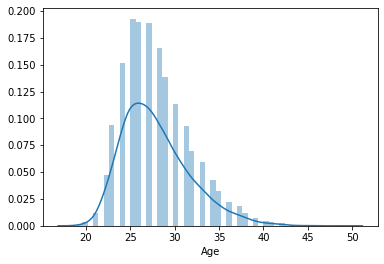

In [8]:
sns.distplot(df['Age']);

In [9]:
df['Age'].nunique()

28

In [10]:
df.isna().sum().sort_values()

Season           0
Med%             0
Hard%            0
kwERA            0
TTO%             0
              ... 
SC-Z (pfx)    4985
SC-X (pfx)    4985
SC% (pfx)     4985
vSC (pfx)     4985
PO%           4994
Length: 299, dtype: int64

In [0]:
df = df.fillna('Missing')

In [12]:
df['Season'].describe()

count    4994.000000
mean     2015.118142
std         1.998612
min      2012.000000
25%      2013.000000
50%      2015.000000
75%      2017.000000
max      2018.000000
Name: Season, dtype: float64

In [0]:
### Make Season numerical ###

df['Season'] = pd.to_numeric(df['Season'])

In [0]:
# Train, Val, Test

train = df[df['Season'] <= 2015.0]
val = df[df['Season'] == 2016.0]
test = df[df['Season'] >= 2017.0]

In [14]:
train.shape, val.shape, test.shape

((2731, 299), (736, 299), (1527, 299))

In [15]:
pip install category_encoders

     |████████████████████████████████| 102kB 3.6MB/s 


In [0]:
# Decision Tree
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

In [17]:
# The status_group column is the target
target = 'Age'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

train_features.select_dtypes(exclude='number').nunique()
# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features
print(features)

['Season', 'W', 'L', 'ERA', 'WAR', 'G', 'GS', 'CG', 'ShO', 'SV', 'BS', 'IP', 'TBF', 'H', 'R', 'ER', 'HR', 'BB', 'IBB', 'HBP', 'WP', 'BK', 'SO', 'GB', 'FB', 'LD', 'IFFB', 'Balls', 'Strikes', 'Pitches', 'RS', 'IFH', 'BU', 'BUH', 'K/9', 'BB/9', 'K/BB', 'H/9', 'HR/9', 'AVG', 'WHIP', 'BABIP', 'LOB%', 'FIP', 'GB/FB', 'LD%', 'GB%', 'IFFB%', 'HR/FB', 'IFH%', 'BUH%', 'RAR', 'tERA', 'xFIP', 'WPA', '-WPA', '+WPA', 'RE24', 'REW', 'pLI', 'inLI', 'gmLI', 'Pulls', 'WPA/LI', 'O-Swing%', 'Z-Swing%', 'Swing%', 'Contact%', 'Zone%', 'SwStr%', 'HLD', 'SD', 'MD', 'ERA-', 'FIP-', 'xFIP-', 'K%', 'BB%', 'SIERA', 'RS/9', 'E-F', 'RA9-WAR', 'BIP-Wins', 'LOB-Wins', 'FDP-Wins', 'K-BB%', 'Pull%', 'Cent%', 'Oppo%', 'Soft%', 'Med%', 'Hard%', 'kwERA', 'TTO%', 'Team', 'KN%', 'KNv', 'PO%', 'wKN', 'wKN/C', 'FO% (pfx)', 'EP% (pfx)', 'SC% (pfx)', 'KN% (pfx)', 'UN% (pfx)', 'vFO (pfx)', 'vEP (pfx)', 'vSC (pfx)', 'vKN (pfx)', 'FO-X (pfx)', 'EP-X (pfx)', 'SC-X (pfx)', 'KN-X (pfx)', 'FO-Z (pfx)', 'EP-Z (pfx)', 'SC-Z (pfx)', 'KN-

In [25]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=3)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.453804347826087


In [0]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest

In [27]:
# Random Forest

%%time


pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    SelectKBest(k=25),
    RandomForestClassifier(random_state=0, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
print ('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8192934782608695
CPU times: user 1.59 s, sys: 30.3 ms, total: 1.62 s
Wall time: 1.23 s


In [0]:
# I want to dive more into the data and other categories and see if they work
# and what their correlation is